## Data Cleaning Practice

Candy is ranked in 3 categories - "Joy", "Meh", "Despair" - I'd like to see a chart of the top 5 candies, with a breakdown of voting per category, and a chart of the lowest 5 candies, with a breakdown of voting per category

In [151]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
##Above allows us to ignore the warning that we get when we are modifying a copy of a dataframe
#This comes into play when removing NaN values after filtering our original dataframe

import matplotlib.pyplot as plt
##Above allows us to plot graphs

When importing a .csv file, we may need to specify the encoding type of that file

There are two solutions: 

1.  We can change the encoding type using a text editor like Notepad++.  Changing data type to UTF-8 will allow it to be easily read by Pandas

2.  We can open the .csv using a text editor like Notepad++, determine the encoding type, and choose the appropriate encoding parameter to pass into .read_csv()

Once determining encoding type, check https://docs.python.org/3/library/codecs.html#standard-encodings to determine the appropriate encoding parameter

pd.read_csv() has a parameter - encoding = "encoding_type"


In [152]:
#For this example, the .csv is in ANSI format, meaning we will pass in mbcs for encoding

candies = pd.read_csv('candyhierarchy.csv', encoding='mbcs')
candies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


This data set is WIDE - 120 unique columns, with 2460 rows

Start to think about how to clean this data set - first, let's look at a snapshot of our table

In [153]:
candies.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


Right now, our column headers are difficult to read, and includes more information than we're looking for!

First, let's start to "strip out" some of the columns we don't need

All of the relevant data is in columns that begin with "Q6 | "

To do this, we will filter our original dataframe and look for "like" matches to "Q6 | " and assign it to a NEW variable: candy_cols

In [154]:
candy_cols = candies.filter(like="Q6 | ", axis=1)
candy_cols

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,...,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
2456,MEH,DESPAIR,JOY,NaN,NaN,NaN,NaN,DESPAIR,DESPAIR,JOY,...,MEH,MEH,DESPAIR,JOY,NaN,NaN,JOY,DESPAIR,MEH,JOY
2457,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,...,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Getting warmer!  Next, let's remove that beginning "Q6 | " from each column so the name is only the relevant piece of candy

To do this, we can use the lstrip() function to remove leading characters from a string

This resulting value will be assigned to our dataframe's .columns property

After this, we will check our dataframes info.  Note the reduction in size by removing unnecessary columns of information!

In [155]:
candy_cols.columns.str.lstrip("Q6 | ")
candy_cols.columns = candy_cols.columns.str.lstrip("Q6 | ")
candy_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 103 entries, 100 Grand Bar to York Peppermint Patties
dtypes: object(103)
memory usage: 1.9+ MB


Next up, if we take a look at our data we can see numerous NaN (Not a Number) values.  There are several ways for dealing with NaN, but the most popular methods are:

1. Replace NaN values with a new value, typically the median, mean, or mode

2. Remove the NaN row entirely (More popular, as it avoids potential skewing of data)

To remove a NaN row, we can utilize .dropna()

To modify the original dataframe, we can use the parameter inplace=True

NOTE: If we have created a copy of our original dataset, we will need to override Pandas' Chained Assignment warning to allow us to modify that copy in place

Alternatively, we could create a new variable for this dataset.  To save space, I am using the same candy_cols copy we created earlier

In [156]:
candy_cols.dropna()
candy_cols.dropna(inplace=True)
candy_cols

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
8,JOY,DESPAIR,JOY,MEH,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,...,MEH,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR
13,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY
14,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,JOY,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,MEH
2454,JOY,MEH,JOY,DESPAIR,MEH,MEH,MEH,MEH,DESPAIR,JOY,...,JOY,JOY,JOY,JOY,MEH,MEH,JOY,MEH,MEH,JOY
2455,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,...,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR,MEH
2457,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,...,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH


Perfect!  Now we just have our types of candies, and valid values for each one (DESPAIR, MEH, or JOY)

Next up, we'll further optimize our dataset using CATEGORIES

These are useful for columns with just a few different values - instead of holding each value, Pandas will hold 1 of each unique value, and all cells with same value will point to that same reference

This can greatly reduce the memory footprint of our dataset!

In [157]:
#Returns number of unique values per column (expected output would be 3)
candy_cols.nunique()

#Since ALL columns have 3 unique values, instead of manually inputting them we'll loop through them all and assign them to categories
for col in candy_cols.columns:
    candy_cols[col] = candy_cols[col].astype('category')

#Our new dataset (Note how small our dataset size is now!)
candy_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 1 to 2459
Columns: 103 entries, 100 Grand Bar to York Peppermint Patties
dtypes: category(103)
memory usage: 123.2 KB


For our analysis, we are looking at the COUNT for each value in a column

We can use .value_counts() to do this for a specific row, for example for Twix we see:

In [158]:
candy_cols["Twix"].value_counts()

JOY        819
MEH        157
DESPAIR     38
Name: Twix, dtype: int64

Now, to extend this to all columns, we can use the .apply() function, and pass in pd.Series.value_counts

pd.Series specifies a Series/Column method, and here we specify the value_counts method

The result is the same spread of columns, but with rows condensed to JOY, MEH, and DESPAIR

In [159]:
candy_cols.apply(pd.Series.value_counts)

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
DESPAIR,56,625,7,544,336,370,333,691,936,84,...,105,59,484,38,688,449,174,857,765,151
JOY,528,98,900,58,76,115,280,59,14,671,...,610,762,127,819,144,421,522,29,65,614
MEH,430,291,107,412,602,529,401,264,64,259,...,299,193,403,157,182,144,318,128,184,249


So close!!  However, for the purpose of sorting our data to find the most popular candy, it would be better to "flip" our rows and columns, so the three columns are JOY, MEH, & DESPAIR

We can use pd.DataFrame.transpose to achieve this goal

The syntax for this is quite simple: .T which we will chain on our above command to group by unique value counts

In [160]:
candy_cols.apply(pd.Series.value_counts).T

,DESPAIR,JOY,MEH
100 Grand Bar,56,528,430
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),625,98,291
Any full-sized candy bar,7,900,107
Black Jacks,544,58,412
Bonkers (the candy),336,76,602
...,...,...,...
Vicodin,449,421,144
Whatchamacallit Bars,174,522,318
White Bread,857,29,128
Whole Wheat anything,765,65,184


Beautiful!  Now we can start sorting our values!

First, let's sort by the "Joy" column, to see which candies received the most JOY responses

Default sorting is in ascending order.  To specify descending order, we can provide a second parameter: ascending = False

In [161]:
candy_cols.apply(pd.Series.value_counts).T.sort_values(["JOY"], ascending=False)

,DESPAIR,JOY,MEH
Any full-sized candy bar,7,900,107
ReeseÕs Peanut Butter Cups,56,847,111
"Cash, or other forms of legal tender",37,827,150
Kit Kat,28,824,162
Twix,38,819,157
...,...,...,...
JoyJoy (Mit Iodine!),667,51,296
White Bread,857,29,128
Gum from baseball cards,853,23,138
Candy that is clearly just the stuff given out for free at restaurants,754,22,238


Finally, before we plot this, let's take these numeric values and change them to percentages, so it's easier to visualize (and display!)

We can again use .apply(), this time with a lambda expression to divide the cell value by the sum of the row's numeric values (total # of votes), then multiplied by 100 to find the relative percentage for Joy, Despair, or Meh

In [162]:
transformed_candy = candy_cols.apply(pd.Series.value_counts).T.sort_values("JOY", ascending=False)
candy_col_pct = transformed_candy.apply(lambda x: x/sum(x)*100, axis=1)
candy_col_pct
# candy_cols.apply(pd.Series.value_counts).T.sort_values(["JOY"], ascending=False).head().T.plot.bar()

,DESPAIR,JOY,MEH
Any full-sized candy bar,0.690335,88.757396,10.552268
ReeseÕs Peanut Butter Cups,5.522682,83.530572,10.946746
"Cash, or other forms of legal tender",3.648915,81.558185,14.792899
Kit Kat,2.761341,81.262327,15.976331
Twix,3.747535,80.769231,15.483235
...,...,...,...
JoyJoy (Mit Iodine!),65.779093,5.029586,29.191321
White Bread,84.516765,2.859961,12.623274
Gum from baseball cards,84.122288,2.268245,13.609467
Candy that is clearly just the stuff given out for free at restaurants,74.358974,2.169625,23.471400


Now, let's find a way to visualize these results!

As we'll only be working with the top/bottom 5 values, we can chain .head() or .tail() onto our sorting method to just grab 5 rows

Then, using .plot() and specifying the "kind" parameter as 'bar', we can see the below output of a bar graph

Alternatively, can use .plot.bar() to achieve the same output

Since we created a new variable with our transformed data, syntax will be much shorter here!

<AxesSubplot:>

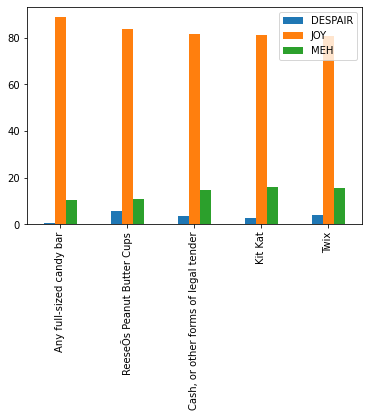

In [163]:
candy_col_pct.head().plot(kind='bar')

This is getting there, but let's see if there's a way to clean this up a bit!

There are a wide variety of parameters available 